# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient
import time

# Data Generation

In [2]:
G = misc.createRandomGraph(size=150, variation=0, density=0.3, prioritized=4)
misc.graphInfo(G)

avg = misc.getAverageDegree(G)
variance = 0
degreeTuples = list(G.degree(list(G.nodes())))

for tuple in degreeTuples:
    variance += abs(avg - tuple[1])

variance = float(variance) / G.number_of_nodes()

variance

Nodes: 150
Edges: 3352
Density: 0.2999552572706935
Max Degree: 101
Average Degree: 44.693333333333335
Static Coloring uses 51 colors


33.69635555555558

In [3]:
updates = misc.extractUpdates(G, 'prioritized')

In [4]:
updates

[(140, 147),
 (0, 24),
 (63, 73),
 (79, 94),
 (48, 138),
 (70, 129),
 (0, 45),
 (0, 135),
 (6, 33),
 (54, 110),
 (0, 31),
 (0, 40),
 (3, 63),
 (0, 55),
 (120, 121),
 (72, 87),
 (82, 115),
 (40, 76),
 (0, 122),
 (48, 61),
 (0, 17),
 (14, 54),
 (53, 80),
 (0, 35),
 (25, 122),
 (6, 51),
 (0, 60),
 (89, 91),
 (122, 142),
 (60, 94),
 (0, 87),
 (68, 100),
 (11, 89),
 (61, 122),
 (23, 46),
 (14, 76),
 (59, 60),
 (0, 128),
 (45, 46),
 (101, 106),
 (0, 61),
 (121, 131),
 (89, 99),
 (0, 1),
 (4, 28),
 (7, 82),
 (0, 147),
 (24, 56),
 (85, 122),
 (0, 129),
 (27, 82),
 (0, 132),
 (0, 8),
 (40, 142),
 (62, 65),
 (106, 115),
 (4, 39),
 (0, 15),
 (0, 108),
 (94, 105),
 (100, 108),
 (0, 46),
 (40, 104),
 (32, 70),
 (4, 106),
 (11, 60),
 (0, 76),
 (8, 58),
 (0, 20),
 (48, 76),
 (0, 51),
 (89, 96),
 (7, 24),
 (0, 62),
 (0, 99),
 (0, 73),
 (0, 137),
 (119, 138),
 (55, 82),
 (0, 27),
 (24, 59),
 (59, 94),
 (40, 84),
 (60, 61),
 (0, 107),
 (1, 115),
 (8, 46),
 (35, 81),
 (1, 89),
 (1, 94),
 (1, 15),
 (60, 9

In [5]:
Ge = nx.Graph()
Ge.add_nodes_from(list(G.nodes()))

# Algorithm Preparation

In [6]:
experimentList = []

experimentList.append([SmallBucket.SmallBucketAlgo(5, Ge), 'Small-Bucket algorithm with d = 5', 10])
experimentList.append([BigBucket.BigBucketAlgo(5, Ge), 'Big-Bucket algorithm with d = 5', 10])
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, 50, dynamicReset=True), 'Static-Dynamic algorithm with l = 50'])
experimentList.append([RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 1 without max degree'])
experimentList.append([RandomWarmUp2.WarmUp2Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 2 without max degree'])
experimentList.append([DcOrient.DcOrientAlgo(Ge), 'DC-Orient'])

# Experimenting

In [7]:
print('Graph used in the experiment:')
misc.graphInfo(G)

for experiment in experimentList:

    if len(experiment) == 3:
        random.seed(experiment[2])
    else:
        random.seed()

    print("")
    print("------------------------------------------------------------------")
    print(str(experiment[1]) + ":")
    iterator = misc.UpdateIterator(experiment[0], updates)

    recolors = 0
    timer = time.perf_counter()

    while True:
        if not misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
            raise ValueError('The coloring produced is incorrect')
        c1 = iterator.algo.getColoring()
        if iterator.runUpdate(1):
            c2 = iterator.algo.getColoring()
            recolors += misc.numberOfRecolors(c1, c2)
        else:
            #print("all updates finished")
            break

    timer = time.perf_counter() - timer

    print("")
    print("Average number of recolors per update: " + str(float(recolors)/len(updates)))
    print("Total number of colors used at the end: " + str(misc.numberOfColors(iterator.algo.getColoring())))
    print("Time taken : " + str(timer) + " seconds")
    print("Average elementary operations : " + str(iterator.avgElemCounter))
    print("------------------------------------------------------------------")

print("End of experiment list reached")



Graph used in the experiment:
Nodes: 150
Edges: 3352
Density: 0.2999552572706935
Max Degree: 101
Average Degree: 44.693333333333335
Static Coloring uses 51 colors

------------------------------------------------------------------
Small-Bucket algorithm with d = 5:

Average number of recolors per update: 3.1455847255369926
Total number of colors used at the end: 56
Time taken : 3.3389635999999996 seconds
Average elementary operations : 3.388126491646778
------------------------------------------------------------------

------------------------------------------------------------------
Big-Bucket algorithm with d = 5:

Average number of recolors per update: 3.7649164677804294
Total number of colors used at the end: 55
Time taken : 3.278619000000001 seconds
Average elementary operations : 5.055787589498807
------------------------------------------------------------------

------------------------------------------------------------------
Static-Dynamic algorithm with l = 50:


KeyboardInterrupt: 

In [ ]:
random.seed(10)
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))
print(bool(random.getrandbits(1)))

True
False
False
False
True


# Results

In [ ]:
print("Average number of recolors per update: " + str(float(recolors)/len(updates)))
print("Total number of colors used at the end: " + str(misc.numberOfColors(iterator.algo.getColoring())))

Average number of recolors per update: 6.572792362768497
Total number of colors used at the end: 16


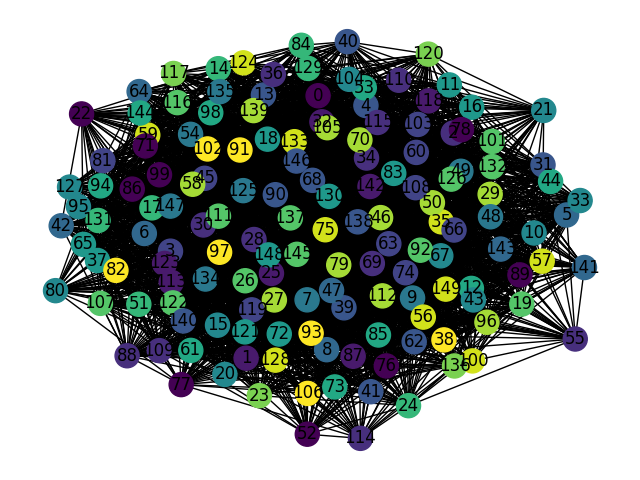

True


In [ ]:
misc.draw(iterator.algo.G, iterator.algo.getColoring())
print(misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()))